In [43]:
# Initialize Otter
import otter
grader = otter.Notebook("hw2.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/calendar.html)**. 

Imports
------

In [44]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

<br><br>

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

**Important**: In this assignment we are using autograder so that you can get feedback on your solutions. For the autograder to work, you need to install `otter` in the course environment as follows. 

1. Go to the command line/terminal.
2. Activate the course conda environment and install otter-grader using the following commands.

    ```
    conda activate cpsc330
    pip install otter-grader
    ```

The cell at the top of the notebook will throw an error if you do not install `otter-grader`. 

<br><br>

## Introducing the data set
 
For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory. 

> You will not be able to push it to your repository (hopefully) because I have seeded the repository wich `.gitignore`.

<br><br>

## Exercise 1: Exploratory data analysis

### 1.1 Loading the data
rubric={autograde}

**Your tasks:**

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column (index=0) of the .csv file should be set as the index.

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 2

In [45]:
spotify_df = pd.read_csv("./data/spotify.csv", index_col=0)

...

Ellipsis

In [46]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

### 1.2 Number of training and test examples
rubric={autograde}

**Your tasks:**

Run the following line of code to split the data. How many training and test examples do we have? Store them in variables `n_train_samples` and `n_test_samples`, respectively.  

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [72]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=321)

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 2

In [48]:
print(train_df.shape) # prints (1613, 16)
print(test_df.shape) # prints (404, 16)

n_train_samples = 1613
n_test_samples = 404

(1613, 16)
(404, 16)


In [49]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<br><br>

#### 1.3
rubric={autograde}

**Your tasks:**

1. Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
2. Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

> Note that `describe` returns another DataFrame.


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [50]:
spotify_summary = train_df.describe()
print(spotify_summary)

       acousticness  danceability   duration_ms       energy  \
count   1613.000000   1613.000000  1.613000e+03  1613.000000   
mean       0.185067      0.620076  2.462533e+05     0.681315   
std        0.255838      0.161152  8.056740e+04     0.206964   
min        0.000003      0.148000  1.604200e+04     0.015600   
25%        0.010000      0.514000  1.999040e+05     0.564000   
50%        0.062600      0.634000  2.298590e+05     0.712000   
75%        0.260000      0.739000  2.703330e+05     0.841000   
max        0.994000      0.984000  1.004627e+06     0.997000   

       instrumentalness          key     liveness     loudness         mode  \
count       1613.000000  1613.000000  1613.000000  1613.000000  1613.000000   
mean           0.134317     5.384377     0.191317    -7.095272     0.619343   
std            0.274217     3.653722     0.156071     3.678993     0.485699   
min            0.000000     0.000000     0.018800   -31.082000     0.000000   
25%            0.000000     

Ellipsis

In [51]:
minRange = 999999999
columnName = ""

for column in spotify_summary:
    columnValues = spotify_summary.loc[:, column]
    columnDifference = columnValues["max"] - columnValues["min"]
    if columnDifference < minRange:
        columnName = column
        minRange = columnDifference

smallest_range_feature = columnName
print(smallest_range_feature)

speechiness


Ellipsis

In [52]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 Plotting histograms 
rubric={points}

The starter code below produces histograms for the `loudness` feature which shows the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using pandas plotting here. You can also use matplotlib if you wish. 

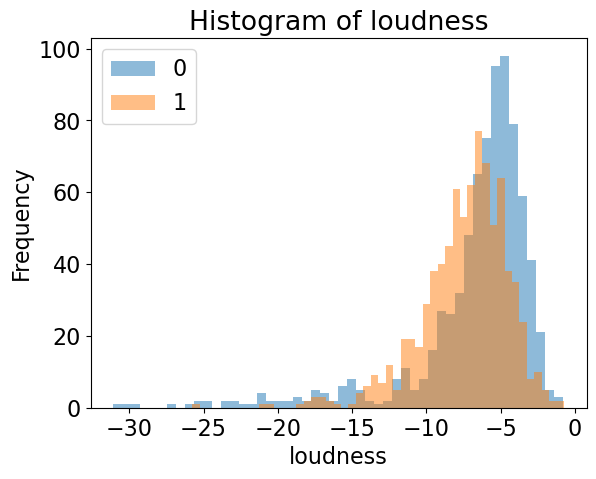

In [53]:
feat = "loudness"
ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 5

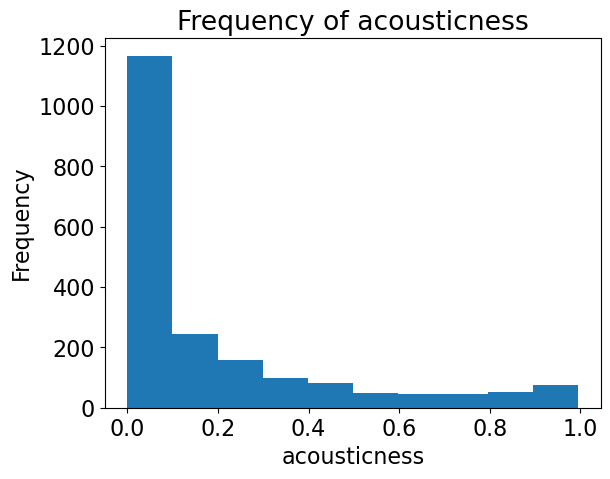

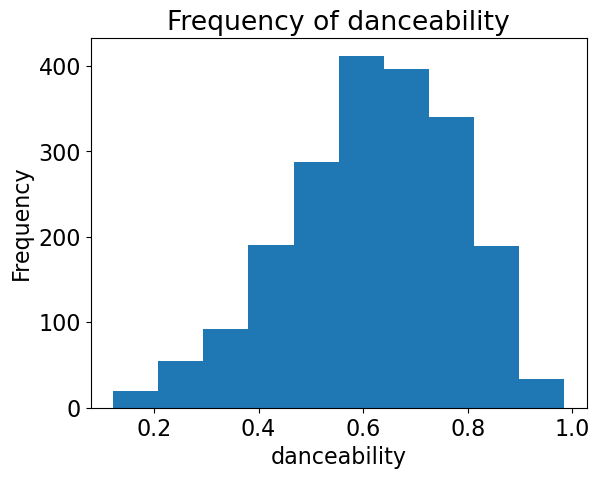

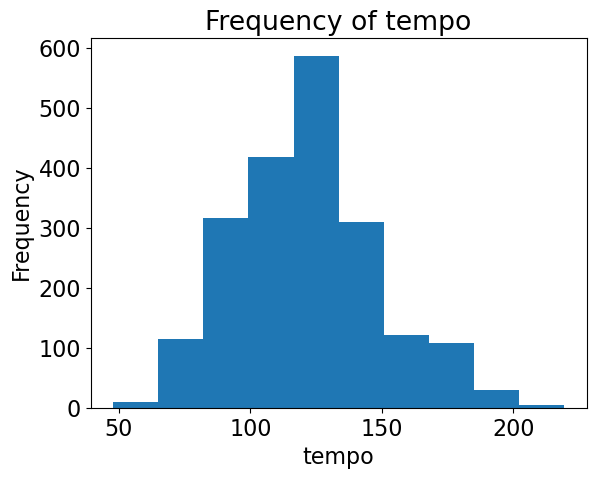

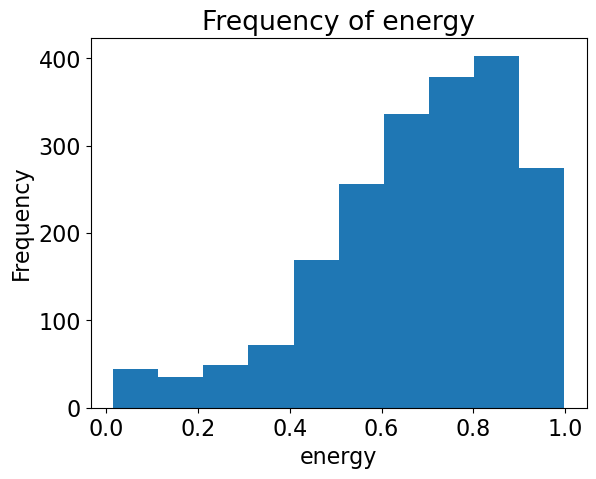

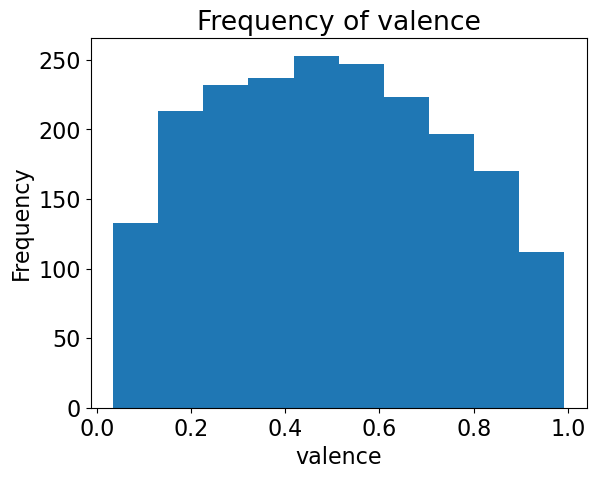

In [54]:
columns = ["acousticness", "danceability", "tempo", "energy", "valence"]

for column in columns:
    spotify_df[column].plot.hist()
    plt.xlabel(column)
    plt.title("Frequency of " + column)
    plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Identical histograms
rubric={points}

**Your tasks:**

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

It is likely that the feature is not that useful for predicting the target class, for just knowing the feature value of a new example would not help in arguing whether or not it is in one class or the other. This is because it is equally likely that the new example is in either target group, since the histograms are the same, and this indicates that this feature has no correlation between the two target classes.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Which columns to include? 
rubric={reasoning}

**Your tasks:**

Note that the dataset includes two free text features labeled `song_title` and `artist`. Do you think these features could be useful in predicting whether the user liked the song or not? Would there be any difficulty in using them in your model?   

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

These features, although perhaps may influence the user's enjoyment of a song, would be very hard and probably not very useful features to include in analysis. First off, the song title and artist do not actually have anything to do with the actual song that is being heard. Secondly, it is hard to use these features, because they are categorical and discrete, and it is hard to give any meaning behind these values. For instance, it is hard to determine how changing the song artist name from "The Yardbirds" to "Led Zeppelin" will actually change the user's enjoyment of the song. There are too many different artists and song titles that each group would be of a small size as well, so overall, these features should probably not be used.

<!-- END QUESTION -->

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to approximate generalization error is by splitting the data into train and test splits, building and tuning the model only using the train split, and carrying out the final assessment on the test split. 

<br><br>

### 2.1
rubric={autograde}

**Your tasks:**

1. Separate `X` and `y` from `train_df` and `test_df` and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. Skip the `song_title` and `artist` columns for now. 

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [85]:
new_train_df = train_df.drop(columns=["song_title", "artist"])
new_test_df = test_df.drop(columns=["song_title", "artist"])

X_train = new_train_df.drop(columns=["target"])
y_train = new_train_df["target"]
X_test = new_test_df.drop(columns=["target"])
y_test = new_test_df["target"]

True
(1613, 13)


In [86]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

### 2.2
rubric={autograde}

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable called `spotify_tree`.
2. Fit the the decision tree classifier. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

In [93]:
spotify_tree = DecisionTreeClassifier(random_state=123)
spotify_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [94]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br>

### 2.3 
rubric={autograde}

**Your tasks**

1. Use the `predict` method to predict the class of the first example in your `X_train` and store the prediction in a variable called `pred` and compare it with the "true" class from `y_train`.   

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 2

In [104]:
pred = spotify_tree.predict(X_train.iloc[[0]])[0]


In [105]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<br><br>

### 2.4
rubric={autograde}

**Your tasks:**

1. Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. Store the mean cross-validation accuracy in a variable called `mean_cv_score`.  


<div class="alert alert-warning">

Solution_2.4
    
</div>

_Points:_ 2

In [129]:
cv_scores = cross_val_score(spotify_tree, X_train, y_train, cv=10)
mean_cv_score = cv_scores.mean()

print(cv_scores)
print(mean_cv_score)

[0.68518519 0.63580247 0.64197531 0.70807453 0.72670807 0.60869565
 0.71428571 0.71428571 0.67701863 0.70807453]
0.6820105820105821


In [112]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<br><br>

### 2.5
rubric={autograde}

The above is useful, but we would like to see the training accuracy as well. 

**Your tasks:**

1. Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True` and save the results in a variable called `scores_df` as a pandas dataframe.  

<div class="alert alert-warning">

Solution_2.5
    
</div>

_Points:_ 3

In [126]:
scores_df = pd.DataFrame(cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True))

In [127]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.6
rubric={points}

**Your tasks:**
1. Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your mean cross-validation score?
2. Do you see a significant difference between the training scores and the cross-validation scores? Briefly discuss in 1 to 2 sentences.

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Points:_ 2

In [131]:
print(cv_scores)
# [0.68518519 0.63580247 0.64197531 0.70807453 0.72670807 0.60869565, 0.71428571 0.71428571 0.67701863 0.70807453]

print(mean_cv_score)
# 0.6820105820105821

print(scores_df)

[0.68518519 0.63580247 0.64197531 0.70807453 0.72670807 0.60869565
 0.71428571 0.71428571 0.67701863 0.70807453]
0.6820105820105821
   fit_time  score_time  test_score  train_score
0  0.044357    0.004577    0.685185     0.999311
1  0.091788    0.003993    0.635802     0.998622
2  0.047793    0.004547    0.641975     0.999311
3  0.039855    0.006096    0.708075     0.998623
4  0.040810    0.006594    0.726708     0.998623
5  0.045687    0.003998    0.608696     0.998623
6  0.028656    0.006549    0.714286     0.998623
7  0.035683    0.006232    0.714286     0.999311
8  0.028720    0.002996    0.677019     0.999311
9  0.027664    0.004534    0.708075     0.998623


1. Inspecting the scores, it seems that the scores have no outliers are not too variable, which is desired, because the cross-validation scores being close to each other means that there are no abnormally lucky cases and unlucky cases. The average cross-validation score is also quite good at 0.682, suggesting that it is quite a good model. Due to the low variability, we can assume that the mean cross-validation score is quite trustworthy.

2. The train scores (train_score) are very high in comparison to the validation scores (test_score), suggesting that the training model may be overfit. Perhaps the depth of the decision tree should be decreased, as we want the train scores and validation scores to be closer together.

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Hyperparameters 

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

### 3.1
rubric={autograde}


**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25). 
2. For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
3. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which. Store the plot in a variable called `max_depth_plot` for autograding. 


> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [137]:
depths = np.arange(1, 25, 2)

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 10

True
(0.7926579560405762, 3)


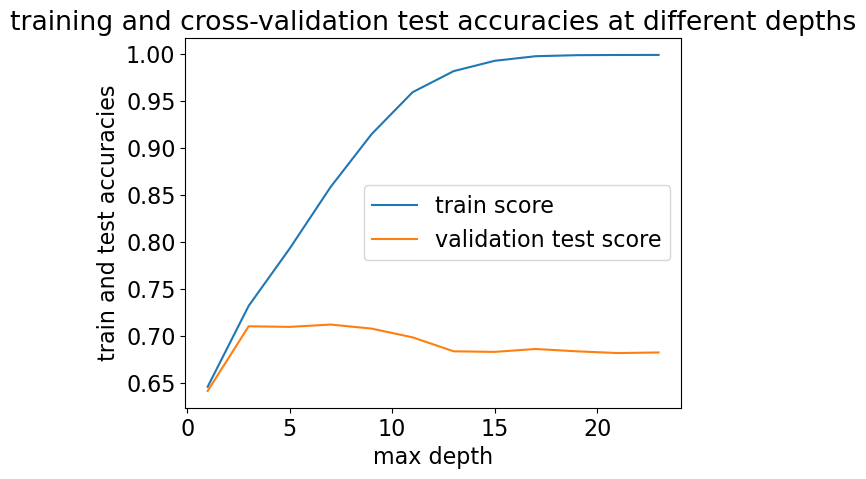

In [220]:
# --- START OF OLD SOLUTION --- #

# train_scores = []
# cv_scores = []

# for each depth
# - fit the decision tree model at that given depth
# - find the train scores and cross validations score for each of the 10 folds
# - add the mean scores to the arrays
# for depth in depths:
#     depth_tree = DecisionTreeClassifier(random_state=26, max_depth=depth)
#     results = cross_validate(depth_tree, X_train, y_train, cv=10, return_train_score=True)
#     train_scores.append(np.mean(results["train_score"]))
#     cv_scores.append(np.mean(results["test_score"]))

# set up the plot
# plt.plot(depths, train_scores, label="train accuracy")
# plt.plot(depths, cv_scores, label="cross-validation test accuracy")
# plt.xlabel("max depth")
# plt.ylabel("train and test accuracies")
# plt.title("training and cross-validation test accuracies at different depths")
# plt.legend()

# max_depth_plot = plt.gcf()

# --- END OF OLD SOLUTION --- #

# adapted from lecture 3 (in "../../lectures/03_ml-fundamentals.ipynb")
results_dict = {
    "depth": [],
    "train score": [],
    "validation test score": [],
}

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=123)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["train score"].append(np.mean(scores["train_score"]))
    results_dict["validation test score"].append(np.mean(scores["test_score"]))

max_depth_plot = pd.DataFrame(results_dict)
max_depth_plot = max_depth_plot.set_index("depth")
max_depth_plot = max_depth_plot.plot()
plt.xlabel("max depth")
plt.ylabel("train and test accuracies")
plt.title("training and cross-validation test accuracies at different depths")
plt.legend()

In [207]:
max_depth_plot.legend().get_texts()[0].get_text()

'mean_train_error'

In [221]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 `max_depth` and the fundamental tradeoff
rubric={reasoning}

**Your tasks:**

Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy.

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 2

As max_depth increases, the training error decreases, which makes sense, for more depth means that the classification model is more specifically catered to the training data. Simultaneously, the difference between the validation error and training error also increases, as the model becomes more and more overfit to the training data that it does not generalize well. Thus, this example illustrates the fundamental tradeoff of supervised learning, for as the model becomes more complex, the training accuracy increases, as well as the difference between the training accuracy and validation accuracy.

<!-- END QUESTION -->

<br><br>

### 3.3 Picking a reasonable value for `max_depth`
rubric={autograde}

**Your tasks:**

From these results, what value for max_depth would you pick as the optimal value? Store it in the variable called `best_max_depth` below. 

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 2

In [225]:
best_max_depth = results_dict["validation test score"]

current_depth = 1
max_validation = 0
for score in results_dict["validation test score"]:
    if score > max_validation:
        max_validation = score
        best_max_depth = current_depth
    current_depth += 2

7


In [226]:
grader.check("q3.3")

q3.3 results: All test cases passed!

<br><br>

### 3.4 Final assessment on the test set
rubric={autograde}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

**Your tasks:**
1. Train a decision tree classifier using the optimal _max_depth_ you chose in the previous exercise on the entire training set.
2. Compute and store it in a variable called `test_score`. 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 3

In [229]:
optimal_tree = DecisionTreeClassifier(max_depth=7, random_state=123)
optimal_tree.fit(X_train, y_train)

test_score = optimal_tree.score(X_test, y_test)
print(test_score)

0.6881188118811881


In [228]:
grader.check("q3.4")

q3.4 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.5 Analysis
rubric={points}

**Your tasks:**

1. How do the test scores compare to the cross-validation scores? Briefly discuss.
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the max_depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

<div class="alert alert-warning">

Solution_3.5
    
</div>

_Points:_ 5

In [232]:
print(results_dict["depth"])
print(results_dict["train score"])
print(results_dict["validation test score"])

print(np.mean(results_dict["train score"]))
print(np.mean(results_dict["validation test score"]))

print(test_score)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[0.6455193340585861, 0.7316246703612783, 0.7926579560405762, 0.8583048548260628, 0.9145820873986402, 0.9592191573019841, 0.9816072510076645, 0.9926288604989815, 0.9975200915868794, 0.9986222572824289, 0.9988289637810347, 0.9988978817686291]
[0.6410628019323672, 0.7098880453952918, 0.7092707614446744, 0.7117398972471436, 0.7074189095928227, 0.6981059734682924, 0.6832528180354267, 0.6826355340848094, 0.6857142857142857, 0.6832489839736217, 0.6813932980599648, 0.6820105820105821]
0.9058344471593954
0.6896451575799403
0.6881188118811881


1. The test score is really close to the cross-validation test scores, meaning that the model's performance on the unseen test data is consistent with its performance on the cross-validation data. Therefore, it seems that the model is not overfit or underfit to the training data, which is a good thing. Thus, there are patterns that the model is able to recognize on the training data that can be applied to unseen data points and do not just apply to the training data.

2. If we choose which max_depth the make the model based off of, it is usually going to be at a max_depth that is as large as possible so that the training accuracy is at 100%. However, this is not a good model to choose, because then the model is overfit to the traning data, but not generalizable to unseen training data, so when the model is deployed in the real world, the accuracy will not be that high, since there are some patterns that the model will see on the training data that only applies to the training data, but not in general data.

3. Since the cross-validation and test scores are quite similar and the model performed well on the unseen test data, we have some confidence that if the model is deployed and used on other spotify datasets, it will perform well. In terms of if the same max_depth would be good on other spotify datasets, it still depends on the the characteristics of the other datasets. They may have similar optimal max_depths, but overall, the hyperparamaterization analysis should be done on new datasets and should not rely that this dataset's optimal max_depth will apply to all datasets.

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 4: Conceptual questions
rubric={points}

Consider the dataset below, which has $6$ examples and $2$ features:

$$X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

<div class="alert alert-warning">

Solution_4
    
</div>

_Points:_ 3

1. We would have [True, True, True, False, False, False]. In this scenario, False would refer to +1, and True would refer to -1, as that is what matches the y-column more.

2. Out of the 6 examples, 5 were correctly predicted, so the training accuracy would be 5/6.

3. It is not possible to obtain 100% accuracy, as there is no way to split up the 6 examples correctly using only one conditional on one feature. The issue mostly lies with the third example (2,2).

<!-- END QUESTION -->

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Make sure to access Gradescope via [Canvas](https://canvas.ubc.ca/courses/117814). Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
4. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.

Congratulations on working with your first machine learning model! Well done 👏👏!